[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



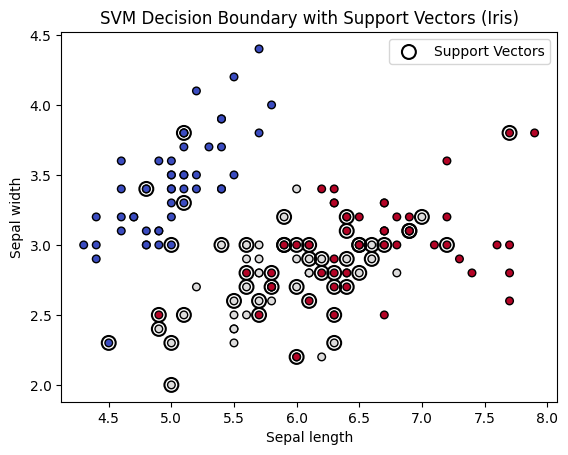

In [1]:
# some code showed by Copolit
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load dataset (Iris dataset as example)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 3: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Train SVM model
# kernel can be 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 6: Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')

# Step 7: Highlight support vectors
plt.scatter(svm_model.support_vectors_[:, 0],
            svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', linewidths=1.5,
            label='Support Vectors')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary with Support Vectors (Iris)')
plt.legend()

Generated side-by-side visualization of hard margin vs. soft margin SVM classification and saved as svm_hard_vs_soft_margin.png


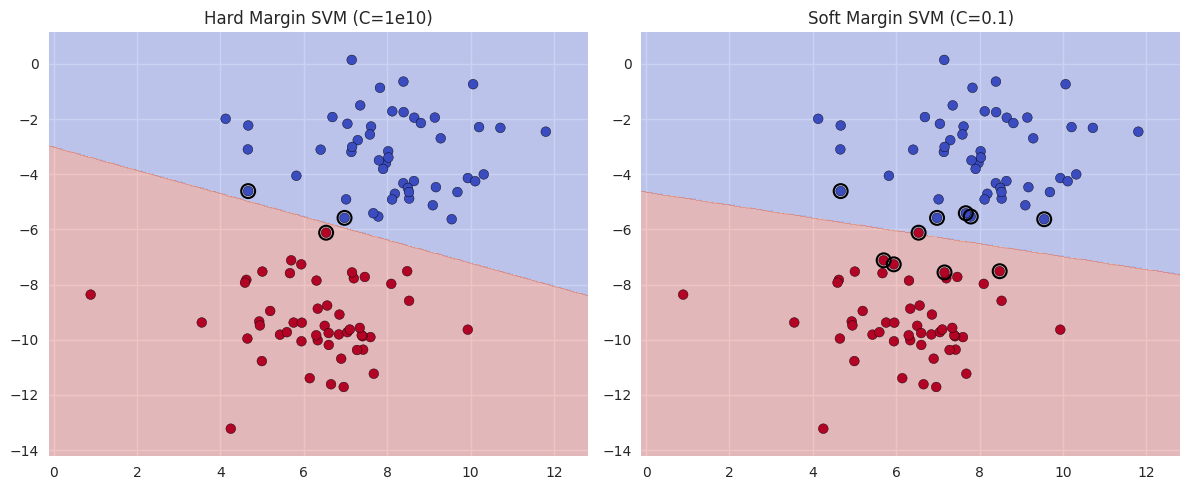

In [2]:
# hard margin vs soft margin
 # Generating side-by-side visualization of hard margin vs. soft margin SVM classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate a toy dataset with two classes
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

# Train SVM with very large C (hard margin approximation)
svm_hard = SVC(kernel='linear', C=1e10)
svm_hard.fit(X, y)

# Train SVM with small C (soft margin)
svm_soft = SVC(kernel='linear', C=0.1)
svm_soft.fit(X, y)

# Create mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict for each point in the grid
Z_hard = svm_hard.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_soft = svm_soft.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Hard Margin Plot
axes[0].contourf(xx, yy, Z_hard, alpha=0.3, cmap=plt.cm.coolwarm)
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
axes[0].scatter(svm_hard.support_vectors_[:, 0], svm_hard.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', linewidths=1.5)
axes[0].set_title('Hard Margin SVM (C=1e10)')
axes[0].set_xlim(xx.min(), xx.max())
axes[0].set_ylim(yy.min(), yy.max())

# Soft Margin Plot
axes[1].contourf(xx, yy, Z_soft, alpha=0.3, cmap=plt.cm.coolwarm)
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
axes[1].scatter(svm_soft.support_vectors_[:, 0], svm_soft.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', linewidths=1.5)
axes[1].set_title('Soft Margin SVM (C=0.1)')
axes[1].set_xlim(xx.min(), xx.max())
axes[1].set_ylim(yy.min(), yy.max())

plt.tight_layout()
output_path = "./output/supportVectorMachines/svm_hard_vs_soft_margin.png"
plt.savefig(output_path)
print("Generated side-by-side visualization of hard margin vs. soft margin SVM classification \
and saved as svm_hard_vs_soft_margin.png")

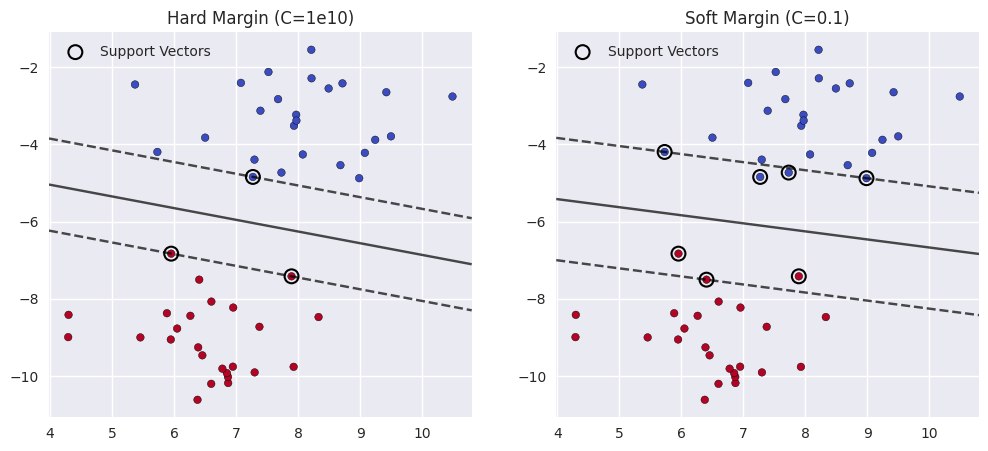

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Step 1: Create toy dataset
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# Step 2: Train two SVMs
hard_margin_svm = SVC(kernel='linear', C=1e10)  # Approximates hard margin
soft_margin_svm = SVC(kernel='linear', C=0.1)   # Soft margin

hard_margin_svm.fit(X, y)
soft_margin_svm.fit(X, y)

# Step 3: Function to plot decision boundary
def plot_svm(model, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k', linewidths=1.5,
               label='Support Vectors')
    
    # Create grid
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])
    ax.set_title(title)
    ax.legend()

# Step 4: Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_svm(hard_margin_svm, axes[0], "Hard Margin (C=1e10)")
plot_svm(soft_margin_svm, axes[1], "Soft Margin (C=0.1)")
plt.show()

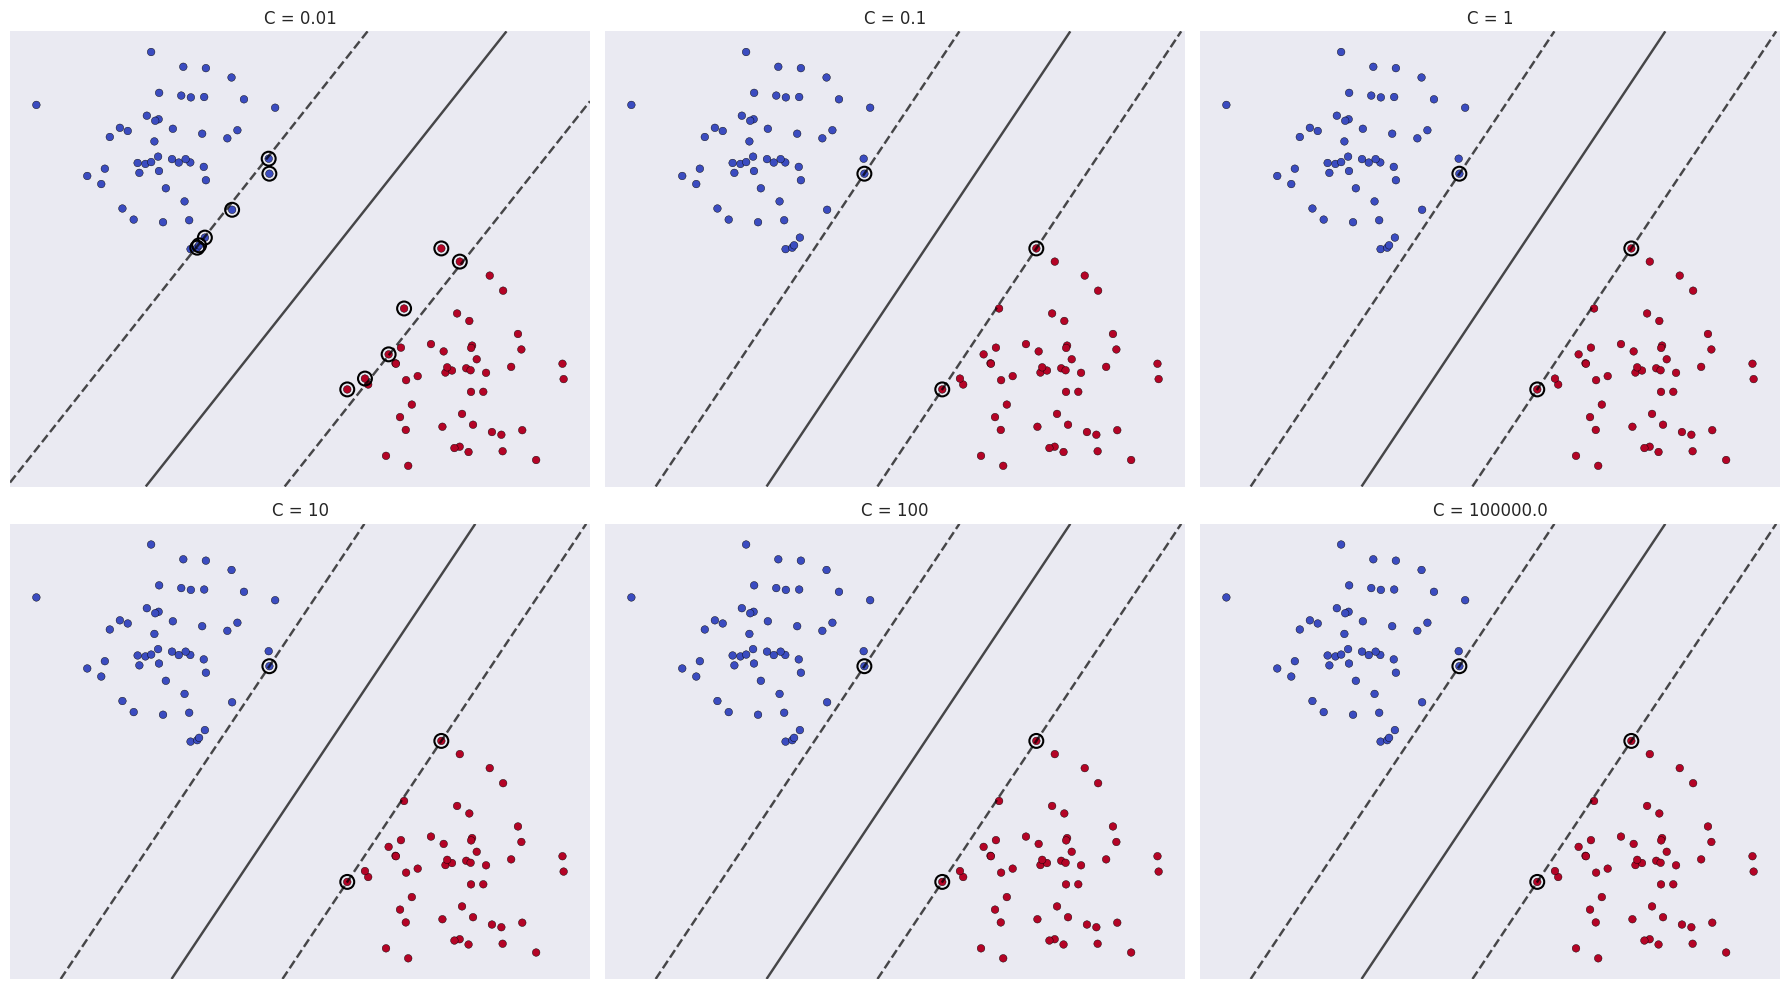

Generated SVM decision boundary plots for varying C values and saved as svm_margin_evolution.png


In [4]:
# Generating SVM decision boundary plots for varying C values on toy dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import os

# Create toy dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# List of C values to test
C_values = [0.01, 0.1, 1, 10, 100, 1e5]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Function to plot SVM decision boundary
def plot_svm(model, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k', linewidths=1.5)

    # Create grid
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

# Train and plot for each C
for i, C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    plot_svm(clf, axes[i], f"C = {C}")

plt.tight_layout()

# Save the figure
output_path = "./output/supportVectorMachines/svm_margin_evolution.png"
plt.savefig(output_path)
plt.show()

print("Generated SVM decision boundary plots for varying C values and saved as svm_margin_evolution.png")

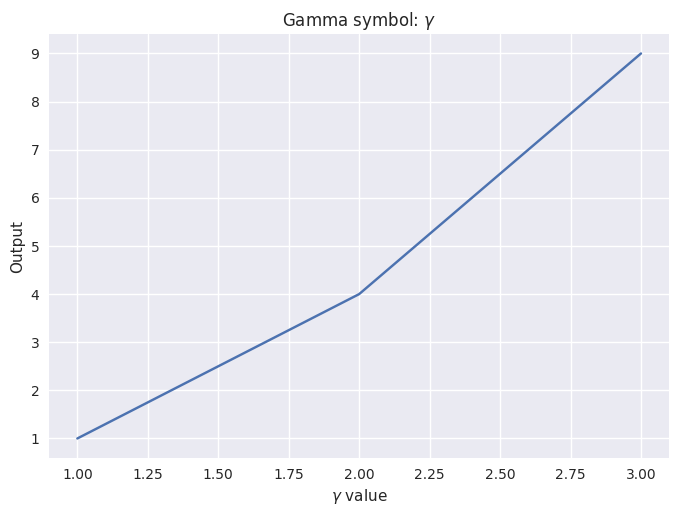

In [5]:
# display the Grecian letters
# Matplotlib supports LaTeX-style math text inside strings. Wrap the symbol in $...$
import matplotlib.pyplot as plt

plt.plot([1,2,3], [1,4,9])

# Title with Greek gamma
plt.title(r'Gamma symbol: $\gamma$')

# Axis labels with gamma
plt.xlabel(r'$\gamma$ value')
plt.ylabel(r'Output')

plt.show()

In [6]:
# SVM Regression (SVR)  ε-SVR
from sklearn.svm import SVR
import numpy as np

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.5, 1.7, 3.2, 3.8, 5.1])

# Train SVR with RBF kernel
svr = SVR(kernel='rbf', C=100, epsilon=0.1)     # epsilon=0.1 → ignore errors ≤ 0.1
                                                # C=100 → strongly penalize larger errors
svr.fit(X, y)

# Predict
y_pred = svr.predict([[6]])
print("Prediction for x=6:", y_pred)

Prediction for x=6: [4.6081063]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Generate toy dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(40)

# Fit Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# Fit SVR with RBF kernel
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X, y)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


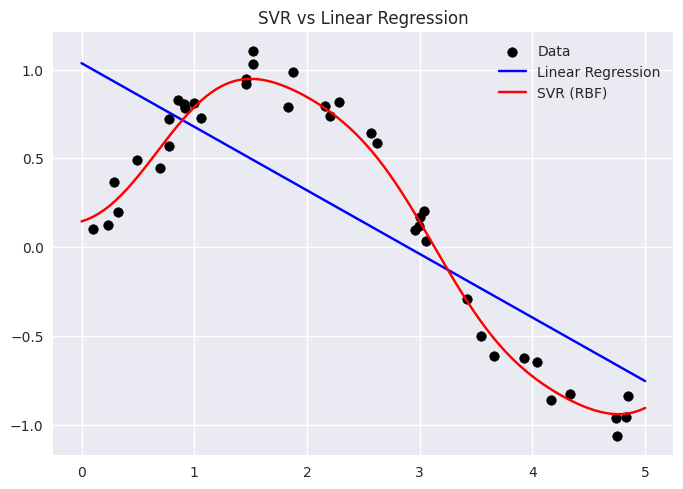

In [9]:
# Predictions
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_lin = lin_reg.predict(X_test)
y_svr = svr.predict(X_test)

# Plot
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_test, y_lin, color='blue', label='Linear Regression')
plt.plot(X_test, y_svr, color='red', label='SVR (RBF)')
plt.legend()
plt.title("SVR vs Linear Regression")
output_path = "./output/supportVectorMachines/svr_vs_linear_regression.png"
plt.savefig(output_path)
plt.show()

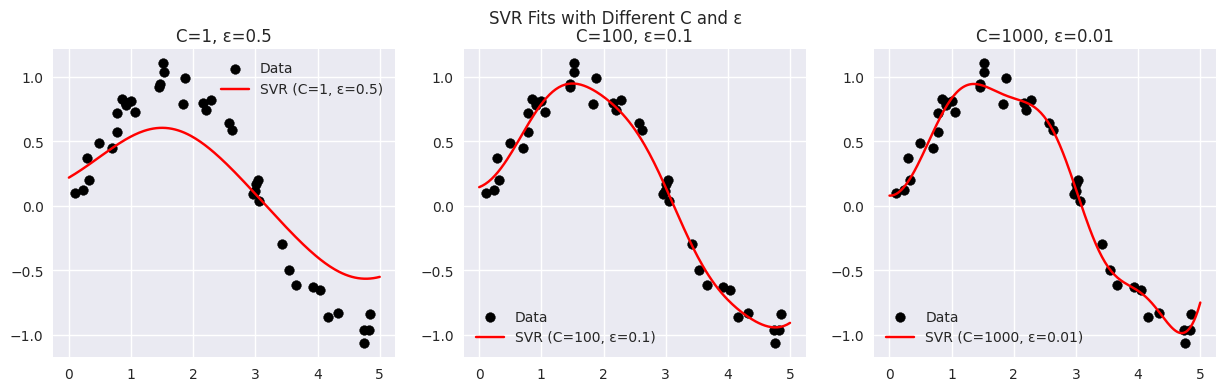

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate toy dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(40)

# Test points
X_test = np.linspace(0, 5, 200).reshape(-1, 1)

# Different parameter settings
params = [
    {"C": 1, "epsilon": 0.5},
    {"C": 100, "epsilon": 0.1},
    {"C": 1000, "epsilon": 0.01},
]

plt.figure(figsize=(15, 4))

for i, p in enumerate(params, 1):
    svr = SVR(kernel='rbf', C=p["C"], epsilon=p["epsilon"])
    svr.fit(X, y)
    y_pred = svr.predict(X_test)
    
    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='black', label='Data')
    plt.plot(X_test, y_pred, color='red', label=f'SVR (C={p["C"]}, ε={p["epsilon"]})')
    plt.title(f'C={p["C"]}, ε={p["epsilon"]}')
    plt.legend()

plt.suptitle("SVR Fits with Different C and ε")
output_path = "./output/supportVectorMachines/svr_w_different_epsilon_and_C.png"
plt.savefig(output_path)
plt.show()

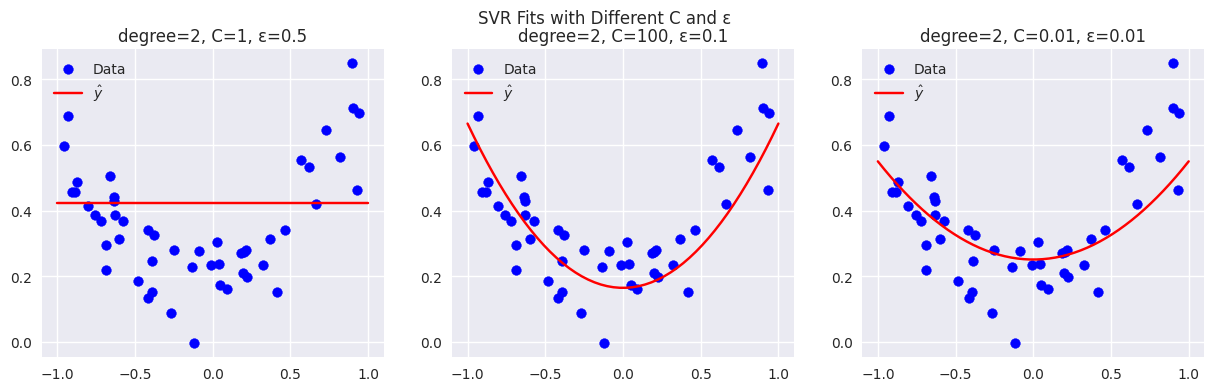

In [94]:
# Make my own SVM model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Generate toy dataset
np.random.seed(42)
#X = np.sort(5 * np.random.rand(40, 1), axis=0)
#y = np.sin(X).ravel() + np.cos(X).ravel() + 0.1 * np.random.randn(40)
#y = np.sin(X).ravel() + 0.1 * np.random.randn(40)
#X_test = np.linspace(0, 5, 100).reshape(-1, 1)

X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

# Predictions
X_test = np.linspace(-1, 1).reshape(-1, 1)

# Different parameter settings
params = [
    {"C": 1, "epsilon": 0.5},
    {"C": 100, "epsilon": 0.1},
    {"C": 0.01, "epsilon": 0.01},
]

plt.figure(figsize=(15, 4))

for i, p in enumerate(params, 1):
    # kernel is in ('rbf', 'linear', 'poly'), we got the best matching for 'rbf'
    my_svr_reg = SVR(degree = 2, kernel='poly', C=p["C"], epsilon=p["epsilon"])
    my_svr_reg.fit(X, y)
    
    y_pred = my_svr_reg.predict(X_test)
    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='blue', label='Data')
#    plt.plot(X_test, y_pred, color='red', label=f'SVR (C={p["C"]}, ε={p["epsilon"]})')
    plt.plot(X_test, y_pred, color='red', label=r'$\hat{y}$')
    plt.title(f'degree={my_svr_reg.degree}, C={p["C"]}, ε={p["epsilon"]}')
    plt.legend()

plt.suptitle("SVR Fits with Different C and ε")
output_path = "./output/supportVectorMachines/my_svr_w_different_epsilon_and_C.png"
plt.savefig(output_path)
plt.show()